In [17]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv('concrete_data.csv')
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [53]:
X = data.drop(columns=['Strength'])
y = data['Strength']
print (X.shape, y.shape)

(1030, 8) (1030,)


###  Model Splitting and training

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
pipe = Pipeline(
            steps=[
                ('scale', StandardScaler()),
                ("LinReg", LinearRegression())
            ]
)

In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('LinReg', LinearRegression())])

In [54]:
y_pred = pipe.predict(X_test)
print(y_pred[:4], '\n')
print(np.array(y_test[:4]).reshape(1, -1))    #the reshaping is for the ease of display

[33.57193547 52.30455714 33.26833873 28.47183073] 

[[24.58 33.4  37.91 32.88]]


### Model Score

In [25]:
r2 = r2_score(y_test, y_pred)
r2

0.581361605983895

In [49]:
mean_square = mean_squared_error(y_test, y_pred)
mean_square

116.33263703371578

### Exporting the trained Model

In [50]:
#packing the trained model
import joblib

In [52]:
file = joblib.dump(pipe, 'model.joblib')

### Graphical view of some data information

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

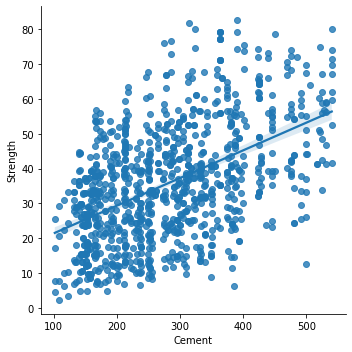

In [41]:
sns.lmplot(x='Cement', y='Strength', data=data)
plt.show()

In [46]:
correlation = data.corr()
correlation

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

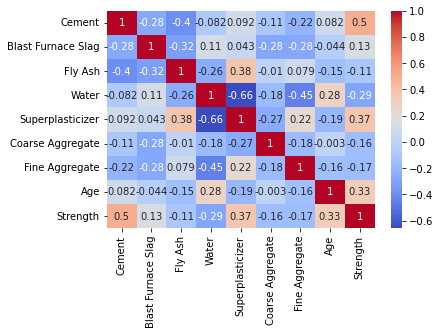

In [48]:
sns.heatmap(correlation, cmap='coolwarm', annot=True)